In [102]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [103]:
w6 = [2856.9450432234726, 2882.167723984183, 0.2638277522553768, 0.2544686548240233]
w5_75 = [2852.176775235967, 2887.2655348728326, 0.2043330305642699, 0.20700163077255782]
w4_5 = [2844.952366759664, 2895.0843960522425, 0.13142364464051698, 0.11986262485263774]
w3_75 = [2837.289258039752, 2904.839033808391, 0.330073709228443, 0.26571966099622285]
w3 = [2838.4807949647734, 2907.617099412783, 0.5368246986182028, 0.4520116191879405]
w1_5 = [2880.0179618792986, 2900.8101160209108, 0.14661143408457541, 0.12042932176077642]

In [104]:
print(w6[1]-w6[0])
print(w5_75[1]-w5_75[0])
print(w4_5[1]-w4_5[0])
print(w3_75[1]-w3_75[0])
print(w3[1]-w3[0])
print(w1_5[1]-w1_5[0])

25.22268076071032
35.08875963686569
50.13202929257841
67.54977576863894
69.13630444800947
20.792154141612173


In [105]:
frequencies = [w6,w5_75,w4_5,w3_75,w3,w1_5]
Brange = [6,5.75,4.5,3.75,3,1.5]
frequencyDifs = [val[1]-val[0] for val in frequencies]
frequencyDifsStd = np.array([np.sqrt(val[2]**2+val[3]**2) for val in frequencies])

In [106]:
def linearFit(x, m, b):
    return m*x + b
vecLinearFit = np.vectorize(linearFit)

In [107]:
parameters, covariance = scipy.optimize.curve_fit(vecLinearFit, Brange[:-1], frequencyDifs[:-1], p0=[75,-20])

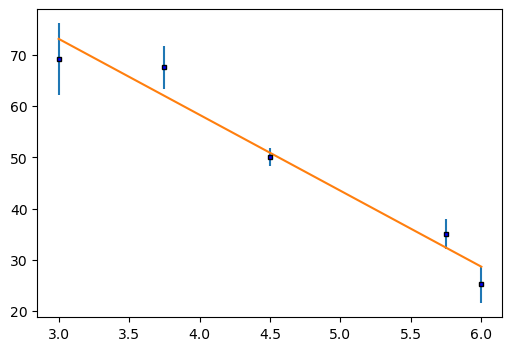

In [108]:
plt.figure(figsize=(6,4))
plt.errorbar(Brange[:-1], frequencyDifs[:-1], frequencyDifsStd[:-1]*10, marker='s', mfc='blue',
         mec='black', ls="None", ms=3,)
plt.plot(Brange[:-1], vecLinearFit(Brange[:-1], parameters[0], parameters[1]))
#plt.yscale('log')